# Упражнения
Классификация набора данных о переписи, доступных в <a href ='http://archive.ics.uci.edu/ml/datasets/Adult'> UC Irvine Machine Learning Repository </a> <br>
Цель состоит в том, чтобы определить, зарабатывает ли человек больше 50 000 долларов США, на основе набора непрерывных и категориальных признаков.


## Набор данных переписи населения
Мы используем набор данных о переписи, который можно получить из <a href='http://archive.ics.uci.edu/ml/datasets/Adult'> UC Irvine Machine Learning Repository </a>.

Полный набор данных содержит 48 842 записей. Для этого упражнения мы сократили количество записей, полей и записей полей и удалили записи с пропущенными значениями. Файл <strong>income.csv </strong> содержит 30 000 записей.


## Импорт
Запустите ячейку ниже, чтобы загрузить библиотеки, необходимые для этого упражнения, и набор данных Census Income.

In [20]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

df = pd.read_csv('data/income.csv')

In [21]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [22]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

### 1. Разделите непрерывные, категориальные атрибуты и столбцы с метками
Вы должны найти 5 категориальных столбцов, 2 непрерывных столбца и 1 метку. <br>
В случае <em> education </em> и <em> education-num </em> не имеет значения, какой столбец вы используете. Для столбца метки обязательно используйте <em> label </em>, а не <em> income </em>. <br>
Присвойте имена переменных "cat_cols", "cont_cols" и "y_col" спискам имен.

In [23]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [24]:
# CODE HERE
cat_cols = ['sex','education', 'marital-status', 'workclass', 'occupation'] 
cont_cols = ['hours-per-week', 'age']
y_col = ['label']



# RUN THIS CODE TO COMPARE RESULTS:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [4]:
# DON'T WRITE HERE

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### 2. Преобразовать категориальные столбцы в category dtypes

In [25]:
# CODE HERE
for cat in cat_cols:
    df[cat] = df[cat].astype('category')





In [26]:
df.dtypes

age                  int64
sex               category
education         category
education-num        int64
marital-status    category
workclass         category
occupation        category
hours-per-week       int64
income              object
label                int64
dtype: object

In [5]:
# DON'T WRITE HERE

### Дополнительно: перемешать набор данных
Набор данных income.csv уже перемешан. 

In [ ]:
# THIS CELL IS OPTIONAL
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

### 3. Установите размеры эмбеддингов
Создайте переменную "cat_szs" для хранения количества категорий в каждой переменной. <br>
Затем создайте переменную «emb_szs» для хранения списка (размер категории, размер эмбеддинга).

In [27]:
# CODE HERE
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs



[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [6]:
# DON'T WRITE HERE

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Создайте массив категориальных значений
Создайте массив NumPy с именем «cats», содержащий массив для каждого категориального столбца <tt> .cat.codes.values </tt> <br>
Примечание: ваш вывод может содержать разные значения. 

In [28]:
cat_cols

['sex', 'education', 'marital-status', 'workclass', 'occupation']

In [29]:
# CODE HERE

sx = df['sex'].cat.codes.values
edc = df['education'].cat.codes.values
mrtst = df['marital-status'].cat.codes.values
wrkcls = df['workclass'].cat.codes.values
ocp = df['occupation'].cat.codes.values
cats = np.stack([sx, edc, mrtst, wrkcls, ocp], 1)





# RUN THIS CODE TO COMPARE RESULTS
cats[:5]

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

In [7]:
# DON'T WRITE HERE

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

### 5.Конвертировать "cats" в тензор
Преобразовать массив NumPy "cats" в тензор dtype <tt> int64 </tt>

In [30]:
# CODE HERE
cats = torch.tensor(cats, dtype=torch.int64) 
cats

tensor([[ 1, 10,  3,  2,  1],
        [ 1, 11,  1,  1,  2],
        [ 1, 10,  0,  3,  7],
        ...,
        [ 1, 12,  1,  2,  7],
        [ 0, 13,  3,  2,  0],
        [ 1,  6,  1,  3,  2]])

In [8]:
# DON'T WRITE HERE

### 6. Создайте массив непрерывных значений
Создайте массив NumPy с именем «conts», содержащий стек каждого непрерывного столбца.
Примечание: ваш вывод может содержать разные значения. Наши пришли после выполнения шага шага, показанного выше.

In [31]:
cont_cols

['hours-per-week', 'age']

In [32]:
df[cont_cols]

,hours-per-week,age
0,40,27
1,50,47
2,20,59
3,57,38
4,40,64
...,...,...
29995,60,45
29996,40,33
29997,55,47
29998,40,32


In [35]:
# CODE HERE
conts = np.stack([df[col].values for col in cont_cols], 1)

# RUN THIS CODE TO COMPARE RESULTS
conts[:5]

array([[40, 27],
       [50, 47],
       [20, 59],
       [57, 38],
       [40, 64]])

In [9]:
# DON'T WRITE HERE

array([[27, 40],
       [47, 50],
       [59, 20],
       [38, 57],
       [64, 40]], dtype=int64)

### 7. Конвертировать "conts" в тензор
Преобразовать массив NumPy "conts" в тензор dtype <tt> float32 </tt>

In [36]:
# CODE HERE
conts = torch.tensor(conts, dtype = torch.float)

# RUN THIS CODE TO COMPARE RESULTS
conts.dtype

torch.float32

In [10]:
# DON'T WRITE HERE

torch.float32

### 8. Создайте тензор для меток
Создайте тензор с именем "y" из значений в столбце метки. Обязательно выровняйте тензор так, чтобы он мог быть передан в функцию потерь (CE Loss function).

In [77]:
# CODE HERE
y = torch.tensor(df[y_col].values, dtype=torch.long).reshape(-1,1)
y

tensor([[0],
        [1],
        [0],
        ...,
        [1],
        [0],
        [1]])

In [11]:
# DON'T WRITE HERE

### 9. Создавайте обучающие и тестовые наборы из cats, conts и y
Мы используем весь батч из 30 000 записей, но меньший размер батча сэкономит время во время обучения.
Мы использовали размер тестовой выборки в 5000 записей, но вы можете выбрать другое фиксированное значение или процент.
Убедитесь, что ваши тестовые записи остаются отдельными от ваших тренировочных записей, не пересекаются.


In [78]:
# CODE HERE
b = 30000 # размер батчв
t = 5000  # размер тестовой выборки

cat_train = cats[:b-t]
cat_test = cats[b-t:b]
con_train = conts[:b-t]
con_test = conts[b-t:b]
y_train = y[:b-t]
y_test = y[b-t:b]





In [12]:
# DON'T WRITE HERE

### Определите класс модели
Запустите ячейку ниже, чтобы определить класс модели TabularModel.

In [79]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Вызов родительского __init__
        super().__init__()
        
        # Настройка атрибутов слоя эмбеддингов, дропаута и нормализации по батчам
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # переменная для хранения списка слоев
        layerlist = []
        
        # переменная для хранения количества эмбеддингов и слоев
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # В цикле создаем слои и добавляем их в список
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Преобразовать список слоев в атрибут класса TabularModel
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Извлечение значений эмбеддингов из входящих категориальных признаков
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Применение дропаута к эмбеддингам
        x = self.emb_drop(x)
        
        # Нормализация данных
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # применение функций слоев к преобразованным входным данным
        x = self.layers(x)
        return x

### 10. Установите случайный seed
Чтобы получить результаты, которые можно воссоздать, установите manual_seed.

In [80]:
# CODE HERE
torch.manual_seed(42)

In [14]:
# DON'T WRITE HERE

### 11. Создайте экземпляр TabularModel.
Создайте экземпляр под названием «model» с одним скрытым слоем, содержащим 50 нейронов, а для dropout слоя установите p=0,4.

In [81]:
# CODE HERE
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)

# RUN THIS CODE TO COMPARE RESULTS
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [15]:
# DON'T WRITE HERE

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Определите функцию потерь и оптимизатор

Создайте функцию потерь под названием «criterion» с помощью CrossEntropyLoss <br>
Создайте функцию оптимизации под названием «optimizer», используя Adam, с learning rate 0,001.

In [82]:
# CODE HERE
criterion = nn.CrossEntropyLoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [16]:
# DON'T WRITE HERE

### Обучите модель
Запустите ячейку ниже, чтобы обучить модель (300 эпох). Помните, что результаты могут отличаться! <br>

In [83]:
y_train = y_train.squeeze(1)
y_train.shape


torch.Size([25000])

In [84]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    #print(y_train.shape, y_pred.shape)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.90242666
epoch:  26  loss: 0.61455870
epoch:  51  loss: 0.51660252
epoch:  76  loss: 0.46511114
epoch: 101  loss: 0.43498155
epoch: 126  loss: 0.41132456
epoch: 151  loss: 0.38809046
epoch: 176  loss: 0.37219352
epoch: 201  loss: 0.35768089
epoch: 226  loss: 0.34817207
epoch: 251  loss: 0.33802575
epoch: 276  loss: 0.32983032
epoch: 300  loss: 0.32239890

Duration: 126 seconds


### 13. Отрисуйте функцию потерь
Результаты могут отличаться.

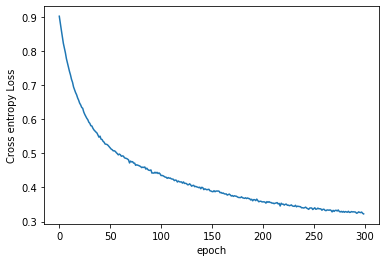

In [85]:
# CODE HERE
plt.plot(range(epochs), losses)
plt.ylabel('Cross entropy Loss')
plt.xlabel('epoch');

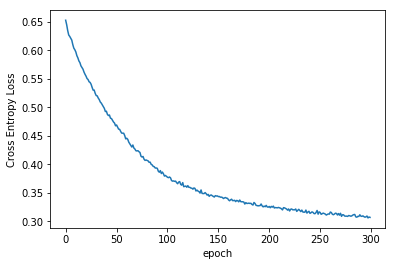

In [18]:
# DON'T WRITE HERE

### 14. Оцените модель

Установите значение <tt> no_grad </tt>, передайте <tt> cat_test </tt> и <tt> con_test </tt> через обученную модель. Создайте набор с именем "y_val". Сравните вывод с <tt> y_test </tt>, используя функцию потерь, определенную выше. Результаты могут отличаться.

In [87]:
y_test.squeeze_(1)
y_test.shape

torch.Size([5000])

In [88]:
# CODE HERE
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)

# RUN THIS CODE TO COMPARE RESULTS
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32981798


In [19]:
# TO EVALUATE THE TEST SET

CE Loss: 0.30774996


### 15. Рассчитайте общий процент точности
Используя цикл for, сравните значения argmax на <tt> y_val </tt> и на тестовом множестве <tt> y_test </tt>.

In [89]:
y_val

tensor([[-0.8532,  1.7521],
        [ 1.9844, -1.1081],
        [ 0.1236,  0.3241],
        ...,
        [-1.3158,  1.1994],
        [ 1.6886, -2.5870],
        [ 1.1965, -0.3425]])

In [92]:
preds_val = torch.argmax(y_val, axis = 1)
preds_val

tensor([1, 0, 1,  ..., 1, 0, 0])

In [90]:
y_test

tensor([1, 0, 1,  ..., 1, 0, 1])

In [101]:
# CODE HERE
correct_preds = float(sum(preds_val == y_test))
all_preds = t
print(correct_preds, "out of ", all_preds, " = ", 100*correct_preds/all_preds, "% correct")


4271.0 out of  5000  =  85.42 % correct


In [20]:
# DON'T WRITE HERE


4255 out of 5000 = 85.10% correct
